# **Mcdonalds Market Segmentation**

### **1. Importing Libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **2. Collecting the data**

In [3]:
df = pd.read_csv('mcdonalds.csv')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


### **3. Exploratory Data Analysis**

In [4]:
df.shape

(1453, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [7]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [8]:
df['Like'].value_counts()

Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64

In [9]:
df['VisitFrequency'].value_counts()

VisitFrequency
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: count, dtype: int64

#### **Visualizing the distribution of categorical variables**

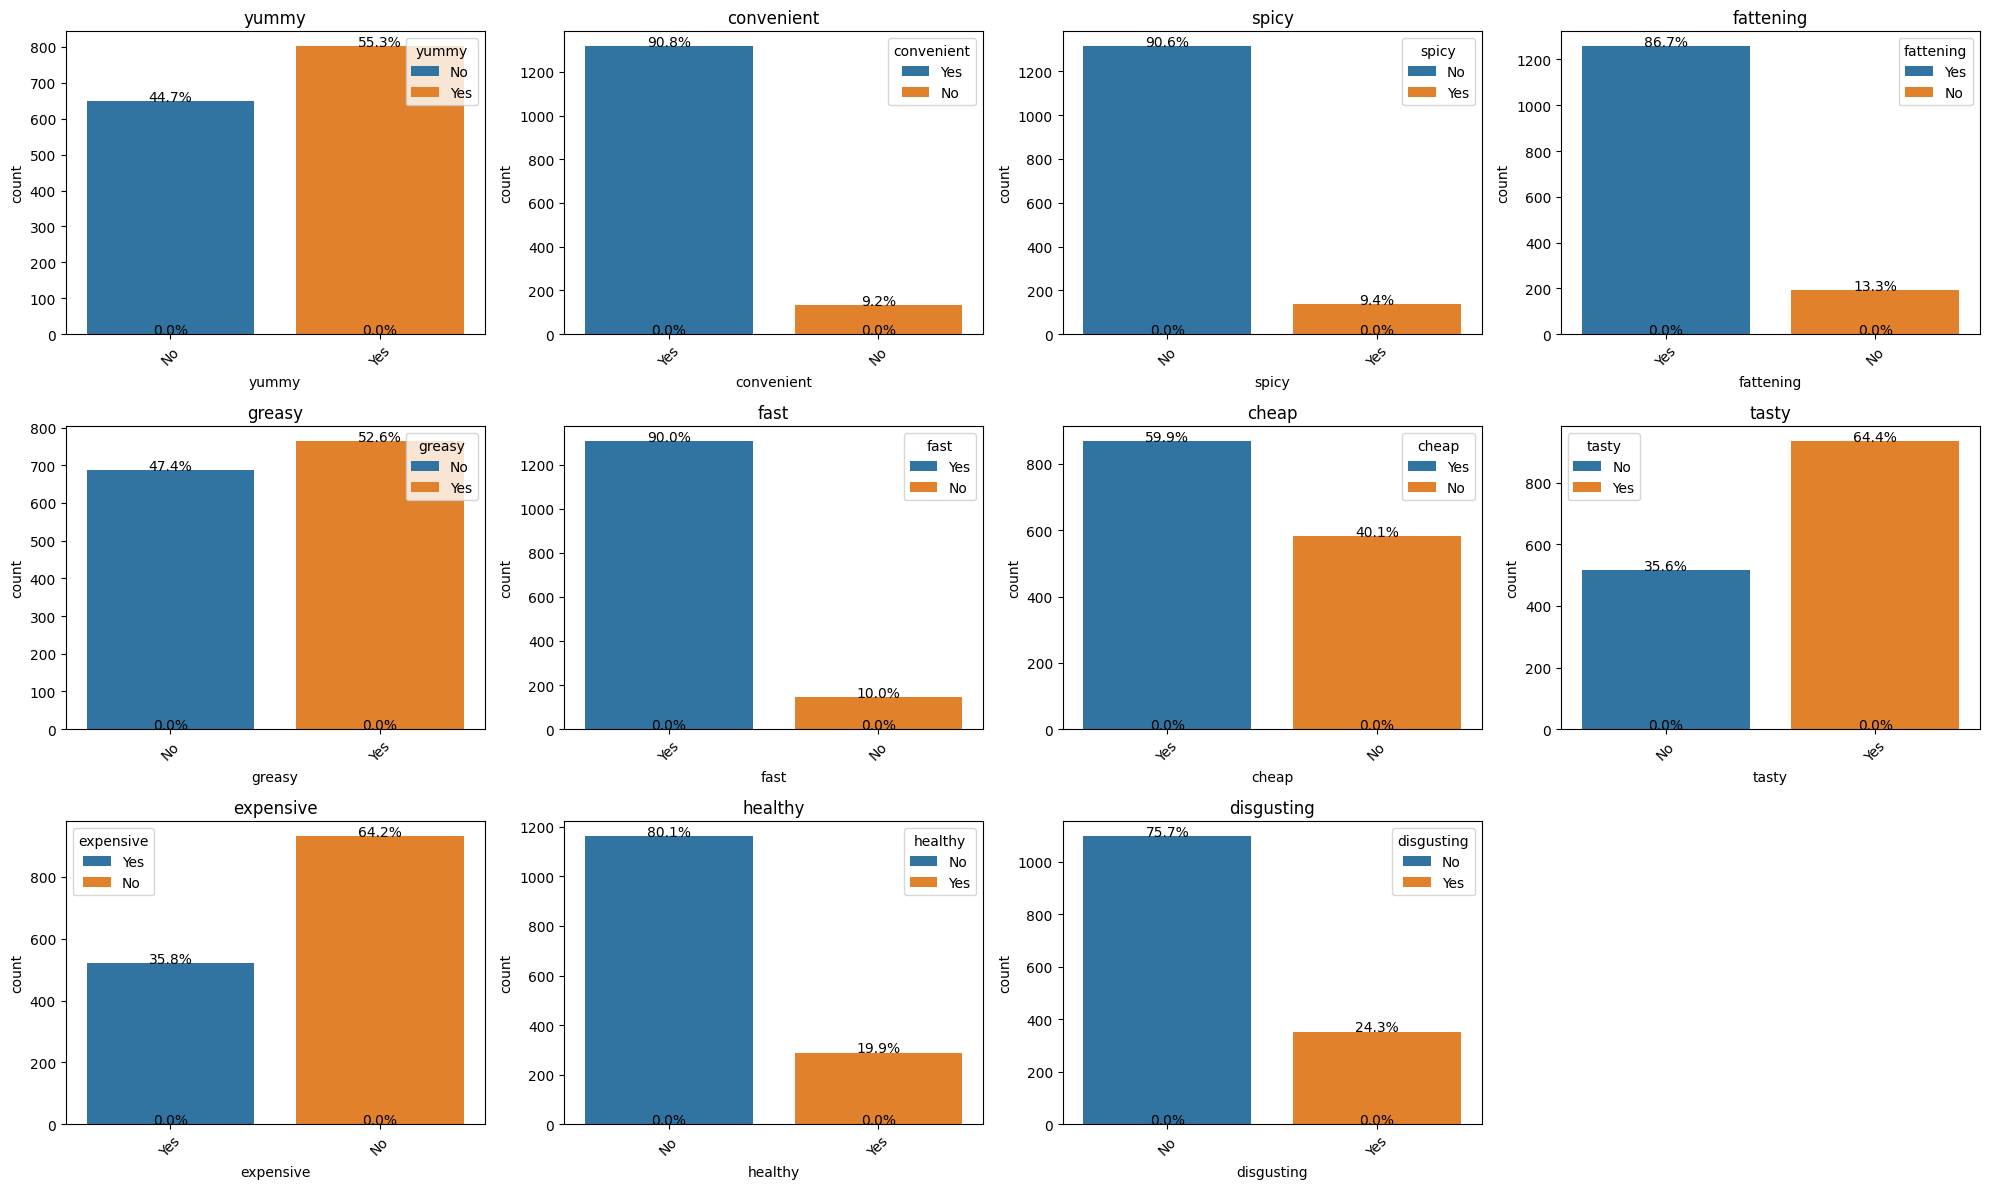

In [10]:
num_cols = len(df.iloc[:, :11].columns)
num_rows = (num_cols + 3) // 4  # Adjusting number of rows dynamically

plt.figure(figsize=(20, 4*num_rows))
for i, col in enumerate(df.iloc[:, :11]):
    plt.subplot(num_rows, 4, i+1)  # Adjusting number of subplots dynamically
    sns.countplot(data=df, x=col, hue=col, dodge=False)
    plt.title(col)
    plt.xticks(rotation=45)
    
    # Adding percentage annotations to the bars
    total_count = len(df[col])
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width()/2, height + 0.5, f'{height/total_count:.1%}', ha='center')

plt.tight_layout()

plt.show()

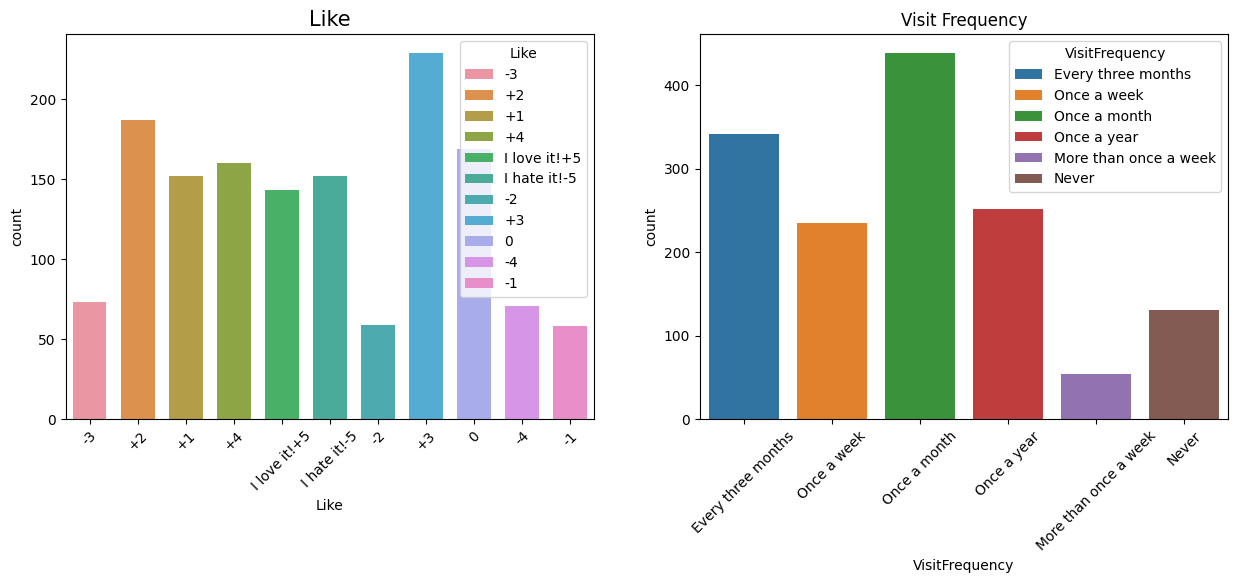

In [11]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Like', width=0.7, hue='Like', dodge=False)
plt.title('Like', fontsize = 15)
plt.xticks(rotation = 45)
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='VisitFrequency', hue='VisitFrequency', dodge=False)
plt.title('Visit Frequency')
plt.xticks(rotation = 45)


plt.show()

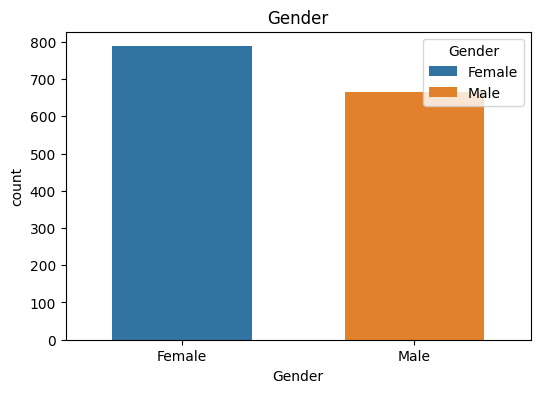

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', hue='Gender', dodge=False, width=0.6)
plt.title('Gender')
plt.show()

#### **Visualizaing the distribution of numerical variable**

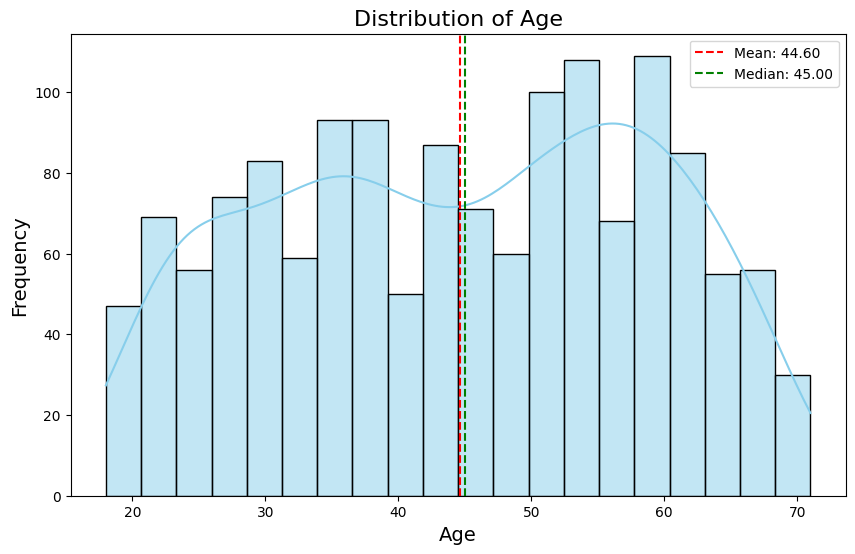

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', kde=True, color = 'skyblue', bins = 20)

# Title
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add mean and median lines
mean_age = df['Age'].mean()
median_age = df['Age'].median()
plt.axvline(mean_age, color='red', linestyle='--', label=f'Mean: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='--', label=f'Median: {median_age:.2f}')

# Add legend
plt.legend()

plt.show()

### **4. Data Transformation**

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data = df.copy()

for i in data.select_dtypes(include='object').columns:
    data[i] = le.fit_transform(data[i])

data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,6,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,3,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,1,49,3,1


### **Correlation Matrix:**

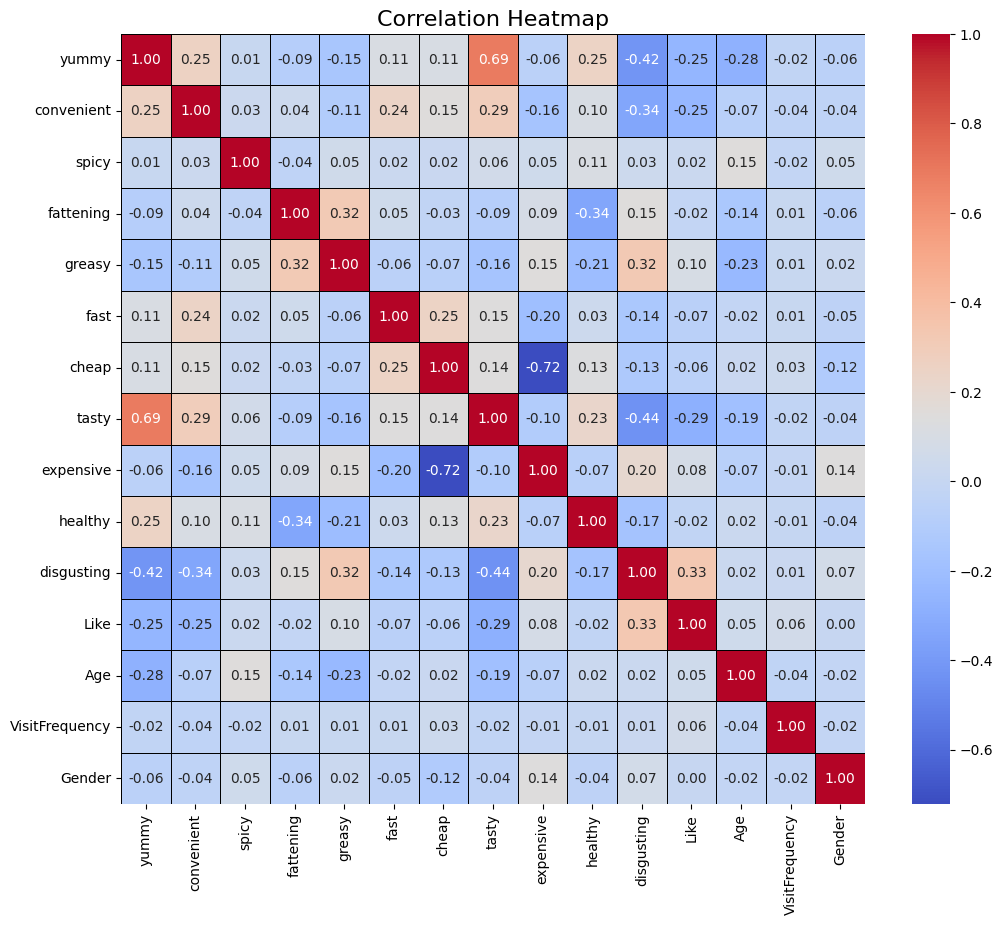

In [15]:
correlation = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(data=correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap', fontsize = 16)

plt.show()

### **Age Vs VisitFrequency by Gender**

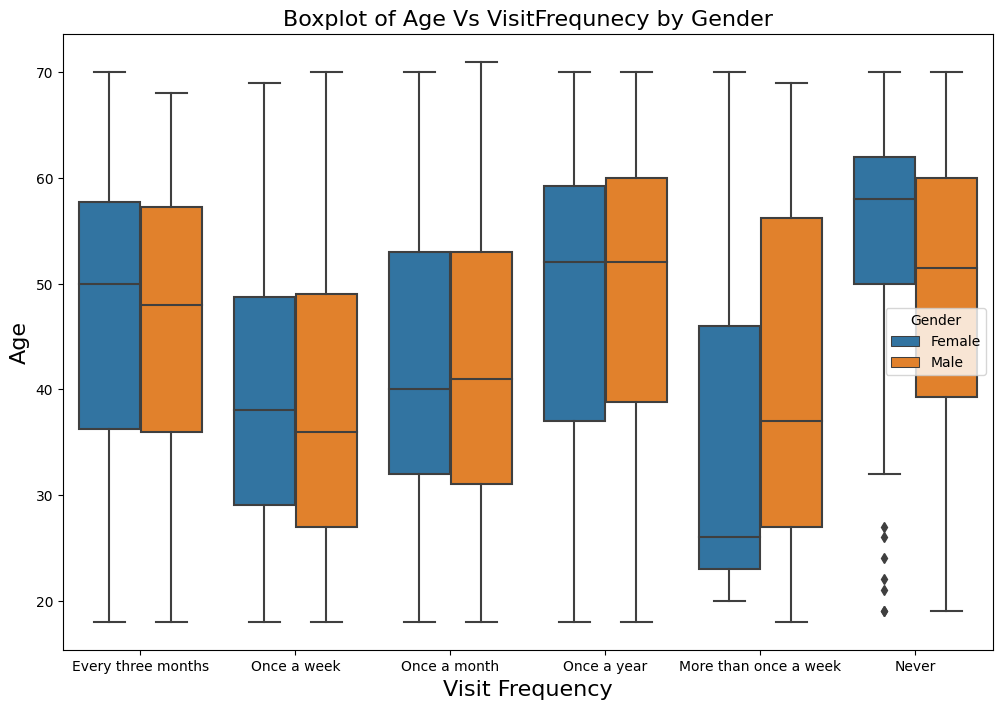

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='VisitFrequency', y='Age', hue = 'Gender')
plt.title('Boxplot of Age Vs VisitFrequnecy by Gender', fontsize = 16)
plt.xlabel('Visit Frequency', fontsize = 16)
plt.ylabel('Age', fontsize = 16)
plt.show()

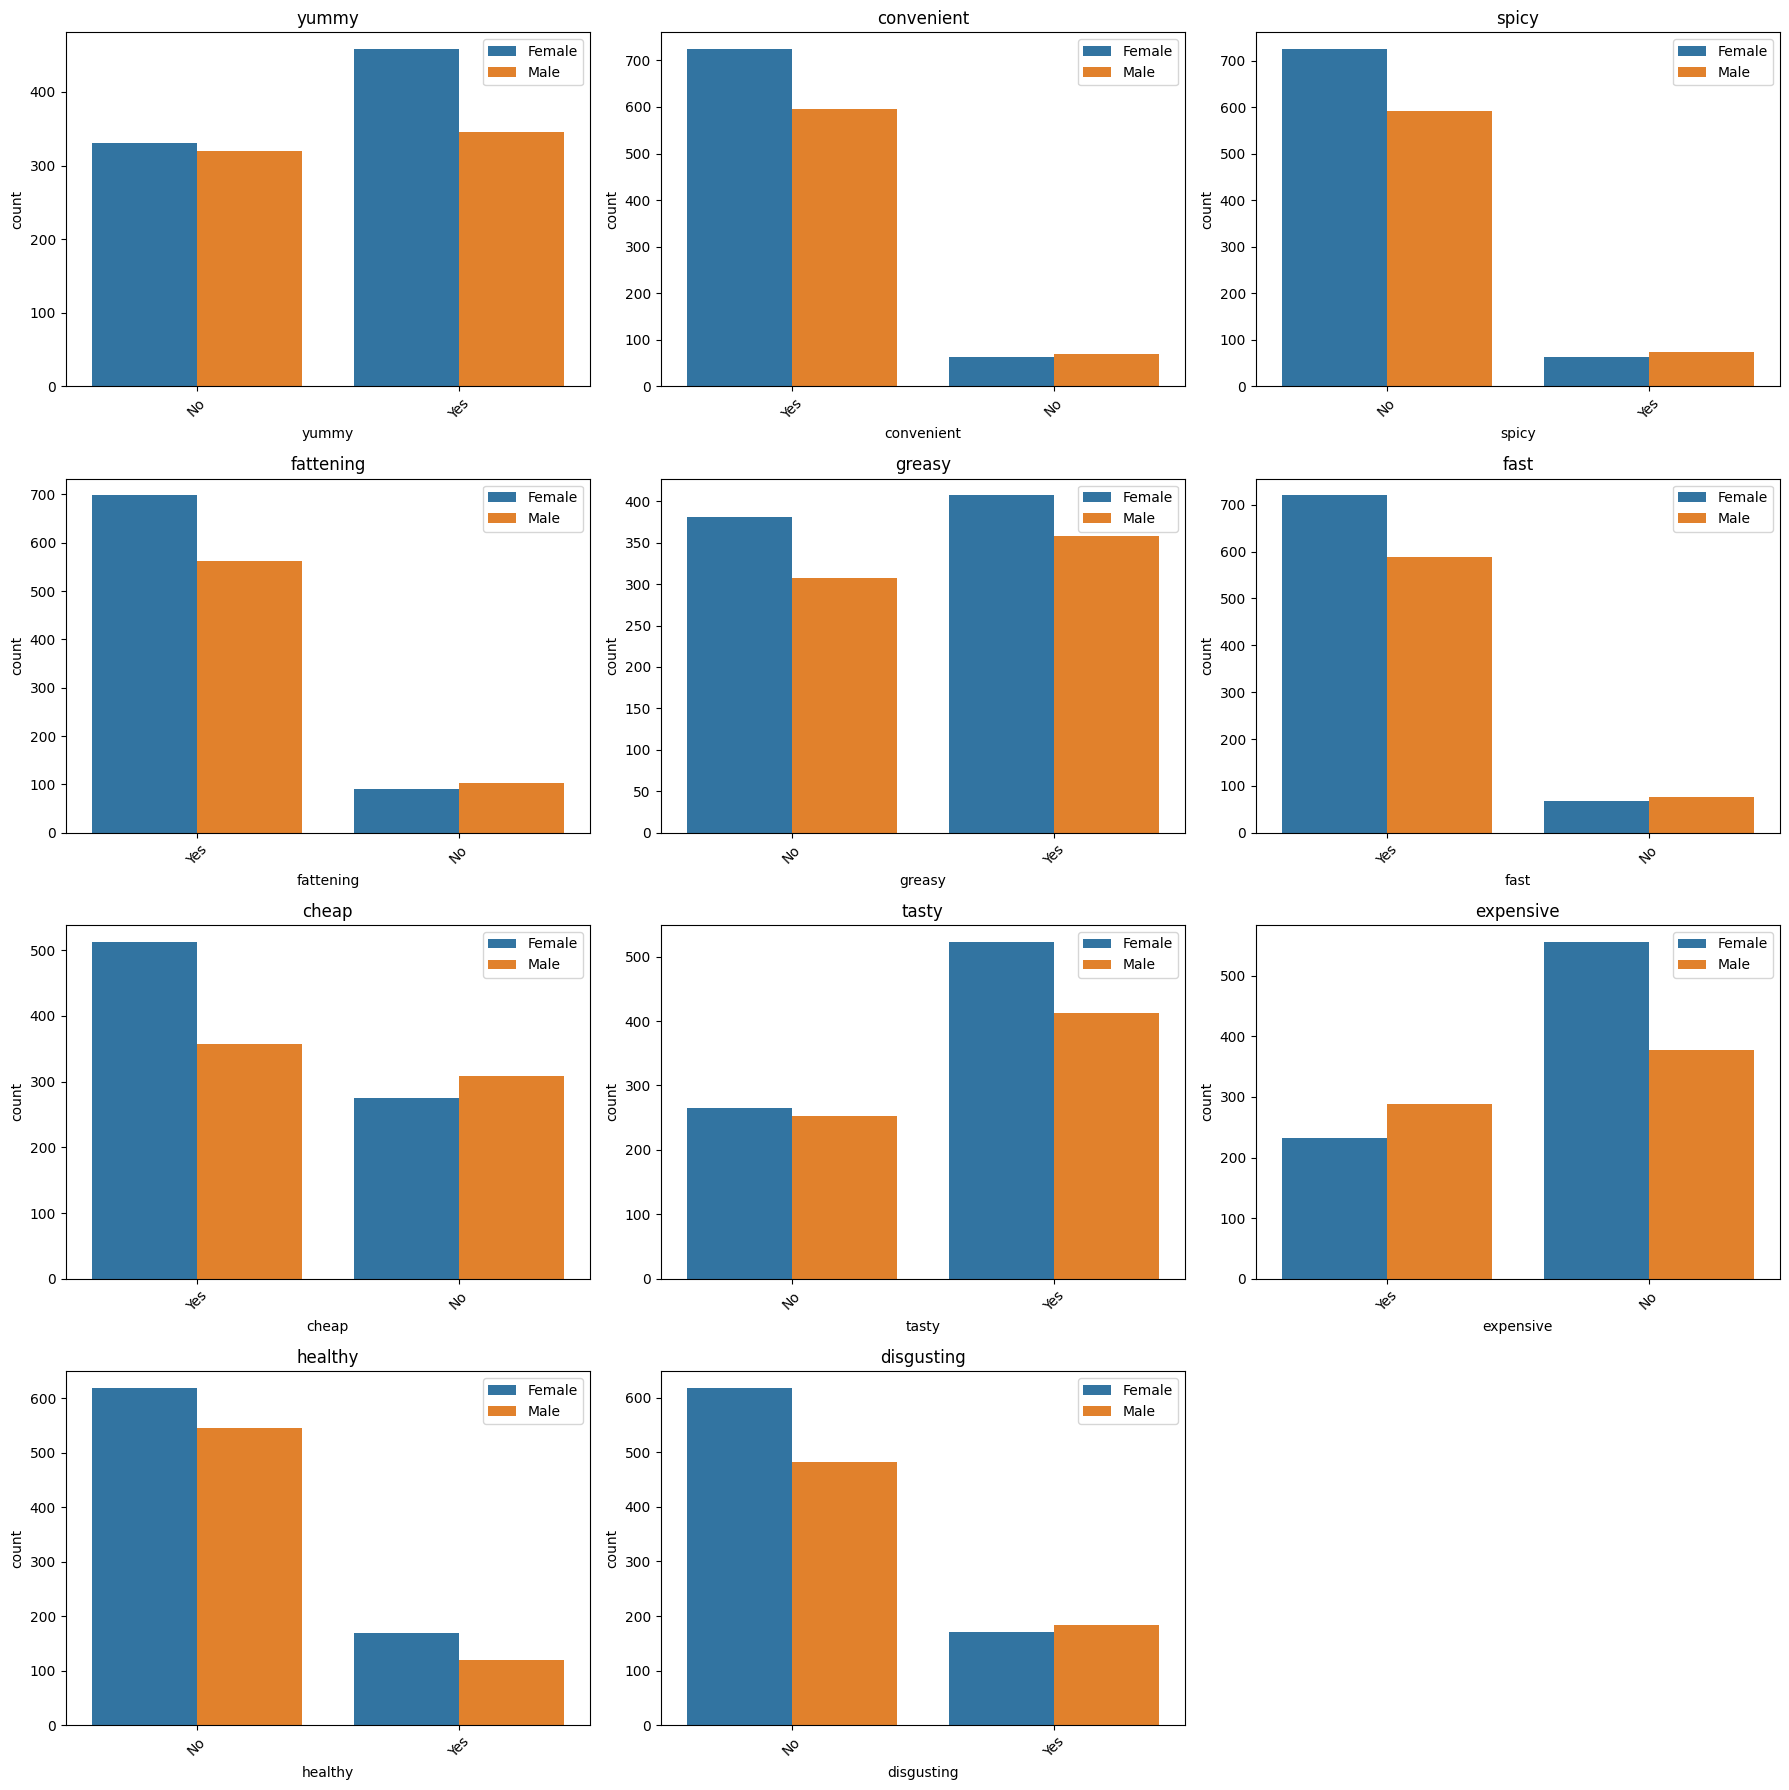

In [17]:
cols = 3
rows = (len(df.iloc[:, :11].columns) + cols - 1) // cols

plt.figure(figsize=(18, 18))

for i, col in enumerate(df.iloc[:, :11].columns):
    plt.subplot(rows, cols, i+1)
    sns.countplot(data=df, x=col, hue='Gender')
    plt.title(col)
    plt.legend()
    plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

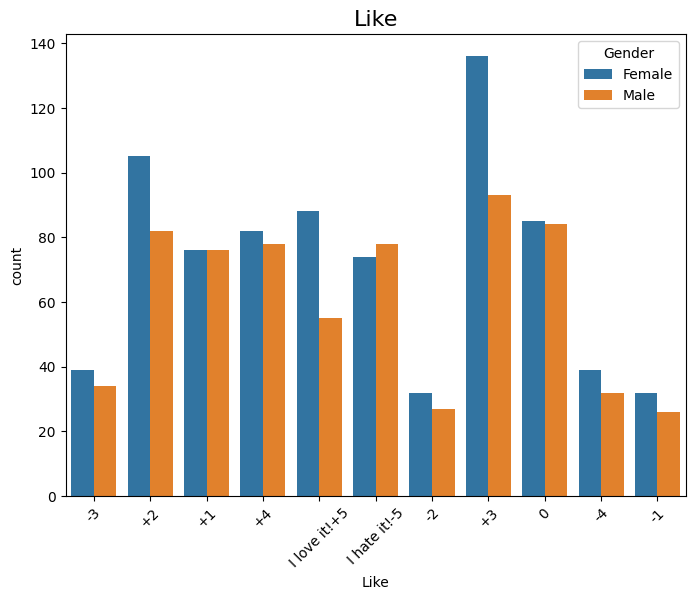

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Like', hue = 'Gender')
plt.title('Like', fontsize = 16)
plt.xticks(rotation = 45)
plt.show()

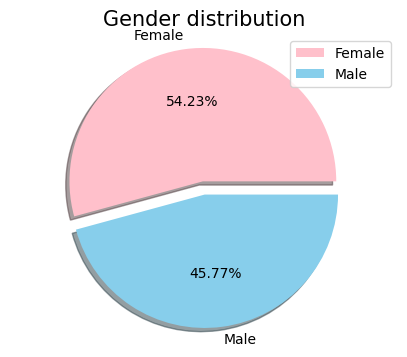

In [19]:
gender_sizes = df['Gender'].value_counts()
gender_explode = [0, 0.1]
gender_labels = ['Female', 'Male']

plt.figure(figsize=(5, 4))
plt.pie(gender_sizes, explode=gender_explode, shadow=True, colors=['pink', 'skyblue'],
        autopct='%.2f%%', labels=gender_labels)

plt.axis('equal')
plt.legend()
plt.title('Gender distribution', fontsize = 15)
plt.show()


### **5. Extracting Segments**

In this Extracting Segments, I have used K-Means Clustering for clustering the segments.

In [20]:
data = df.iloc[:, :11]

for i in data.columns:
    data[i] = le.fit_transform(data[i])

data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


### **Appyling Dimension Reduction Techniques - PCA**

In [21]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

scaled_data = preprocessing.scale(data)

pca = PCA(n_components=11)
principal_components = pca.fit_transform(scaled_data)

# Creating a DataFrame to store the principal components
component_names = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11']
pca_df = pd.DataFrame(data=principal_components, columns=component_names)

# Displaying the first few rows of the PCA DataFrame
pca_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


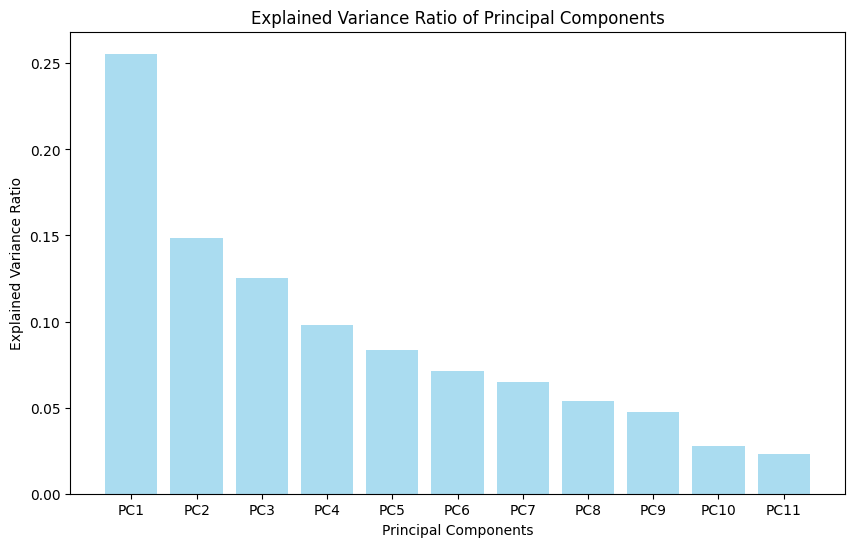

In [22]:
explained_variance_ratio = pca.explained_variance_ratio_

# Plotting the variance explained by each principal component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='skyblue', alpha=0.7)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.xticks(range(1, len(explained_variance_ratio) + 1), [f'PC{i}' for i in range(1, len(explained_variance_ratio) + 1)])

plt.show()

It explains that the first few principal components contain most of the information of the dataset.

#### **Applying the Elbow-Method**

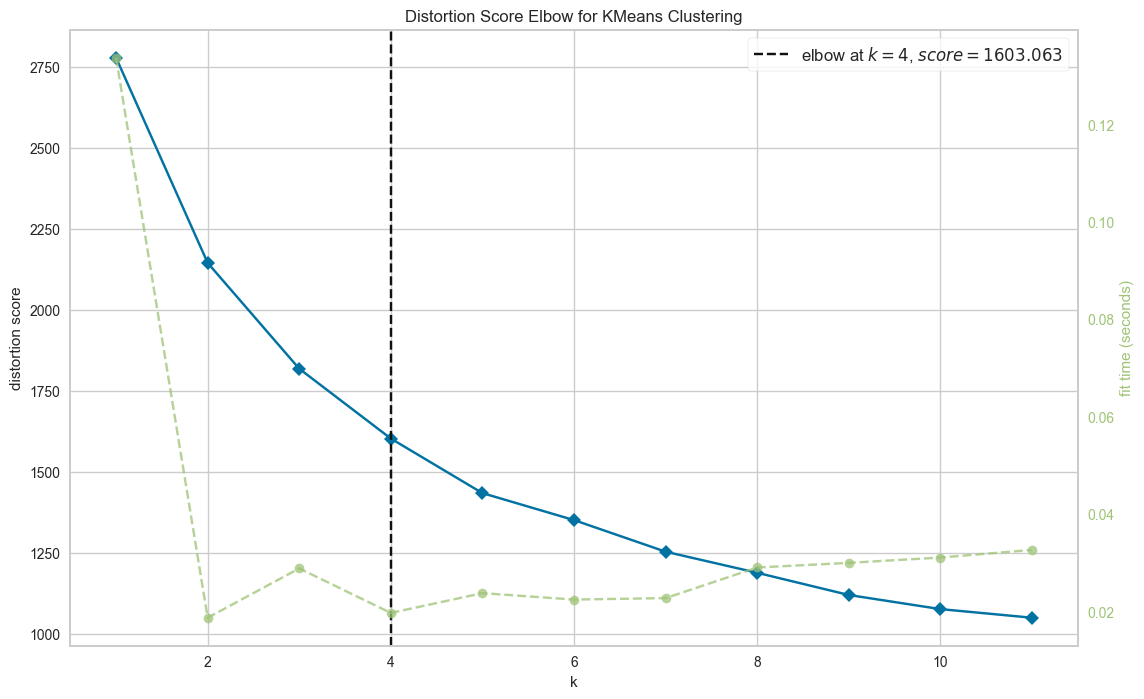

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Initialize KMeans model
model = KMeans()

# Visualize the optimal number of clusters using the elbow method
visualizer = KElbowVisualizer(model, k=(1, 12), size = (1300, 800))
visualizer.fit(data)

# Customize the visualization
visualizer.set_title('Optimal Number of Clusters (K) - Elbow Method')
visualizer.show()

In [24]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


### **K-Means Clustering Algorithm**

In [25]:
from collections import Counter

kmeans = KMeans(n_clusters = 4, random_state=0).fit(data)

df['cluster_num'] = kmeans.labels_

# Print cluster labels assigned to each data point
print('Cluster Labels:', kmeans.labels_)

print('Within-Cluster Sum of Squares (WCSS):', kmeans.inertia_)

print('Number of Iterations:', kmeans.n_iter_)

print('Cluster Centroids:', kmeans.cluster_centers_)

print('Cluster Size:', Counter(kmeans.labels_))

Cluster Labels: [0 2 2 ... 2 1 3]
Within-Cluster Sum of Squares (WCSS): 1602.9303457472083
Number of Iterations: 9
Cluster Centroids: [[0.02265372 0.89320388 0.0776699  0.92556634 0.66019417 0.95145631
  0.91909385 0.15533981 0.01294498 0.07119741 0.38511327]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.85185185 0.95987654 0.13271605 0.90432099 0.61728395 0.85802469
  0.10802469 0.93209877 0.89814815 0.2037037  0.10493827]
 [0.02083333 0.67916667 0.07916667 0.91666667 0.70833333 0.74583333
  0.06666667 0.08333333 0.89583333 0.0625     0.72916667]]
Cluster Size: Counter({1: 580, 2: 324, 0: 309, 3: 240})


In [26]:
df.cluster_num.value_counts()

cluster_num
1    580
2    324
0    309
3    240
Name: count, dtype: int64

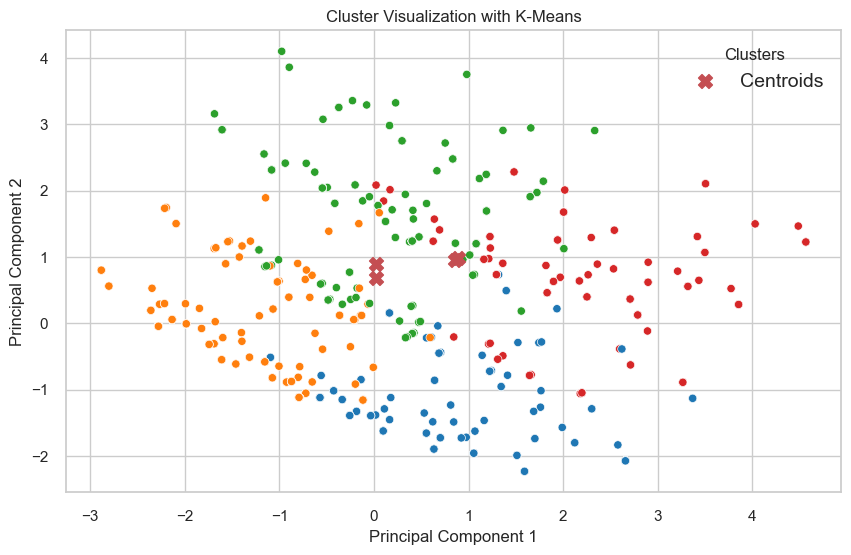

In [27]:
# cluster visualization
sns.set(style="whitegrid")  # Set seaborn style
plt.figure(figsize=(10, 6))  # Set figure size

# Scatter plot
sns.scatterplot(data=pca_df, x="pc1", y="pc2", hue=kmeans.labels_, palette="tab10", legend=False)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=100, label="Centroids")

plt.legend(title="Clusters", loc="upper right", fontsize = 14)

# Add labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Cluster Visualization with K-Means")

plt.show()

### **Target Segment**

In [28]:
df['VisitFrequency'] = le.fit_transform(df['VisitFrequency'])

visit = df.groupby('cluster_num')['VisitFrequency'].mean()

# Convert the series to a dataframe and reset index for better readability
visit = visit.to_frame().reset_index()

# Add column names to the dataframe
visit.columns = ['Cluster Number', 'Mean Visit Frequency']

# Display the dataframe
visit

,Cluster Number,Mean Visit Frequency
0,0,2.809061
1,1,2.584483
2,2,2.540123
3,3,2.679167


In [29]:
df['Like'] = le.fit_transform(df['Like'])

like = df.groupby('cluster_num')['Like'].mean()

like = like.to_frame().reset_index()

like.columns = ['Cluster Number', 'Mean Likes']

like

,Cluster Number,Mean Likes
0,0,5.423948
1,1,3.794828
2,2,3.808642
3,3,6.775000


In [30]:
df['Gender'] = le.fit_transform(df['Gender'])

Gender = df.groupby('cluster_num')['Gender'].mean()

Gender = Gender.to_frame().reset_index()

Gender.columns = ['Cluster Number', 'Gender Mean']

Gender

,Cluster Number,Gender Mean
0,0,0.407767
1,1,0.398276
2,2,0.521605
3,3,0.579167


In [31]:
segment = Gender.merge(like, on='Cluster Number', how='left').merge(visit, on = 'Cluster Number', how='left')

segment.columns = ['Cluster Number', 'Mean Gender', 'Mean Like', 'Mean Visit Frequency']

segment

,Cluster Number,Mean Gender,Mean Like,Mean Visit Frequency
0,0,0.407767,5.423948,2.809061
1,1,0.398276,3.794828,2.584483
2,2,0.521605,3.808642,2.540123
3,3,0.579167,6.775000,2.679167


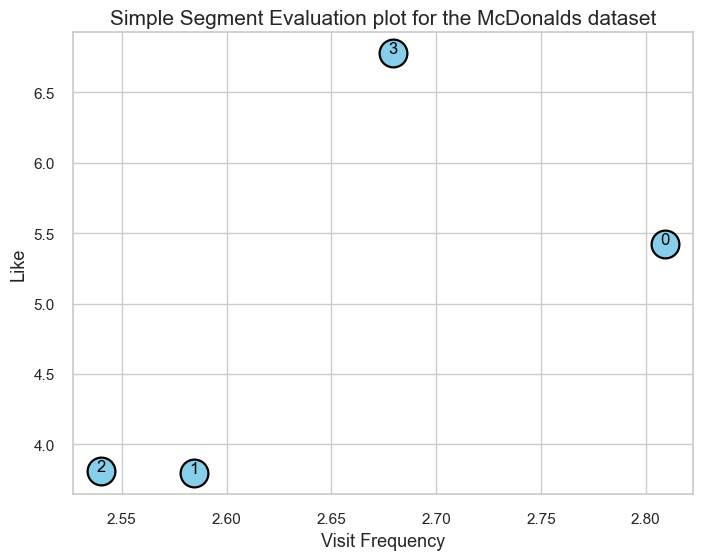

In [32]:
plt.figure(figsize=(8, 6))

sns.scatterplot(data=segment, x='Mean Visit Frequency', y='Mean Like', s=400, color = 'skyblue', edgecolor = 'black')

for i, txt in enumerate(segment['Cluster Number']):
    plt.annotate(txt, (segment['Mean Visit Frequency'][i], segment['Mean Like'][i]), fontsize=12, color='black', ha='center')

plt.title('Simple Segment Evaluation plot for the McDonalds dataset', fontsize = 15)
plt.xlabel('Visit Frequency', fontsize = 13)
plt.ylabel('Like', fontsize = 13)

plt.show()

**It is observed that segment 3 who like the food in McDonalds and are visiting mostly than other segments.**

### **Step-9: Customising the Marketing Mix**
- In Step 9, the marketing mix is designed based on the characteristics and preferences of the different market segments.
- As the target segment for the McDonalds dataset is segment 3, which consists of people who like the food but find it expensive.
- For these customers, we could try to introduce a new product line, DISCOUNT PRICE, specifically tailored to meet their price expectations (4Ps: Price).
- The aim is build customers loyalty, and as these customers income increases, they might shift to the regular McDonald's products.
- To avoid cannibalization, the new product line should have different features (4Ps: Product).
- The company needs to identify the communication channels which are heavily used by segment 3 to promote the new product line (4Ps: Promotion).
- Distribution channels would remain same, but considering separate queue for new product line orders to prevent impacting the main product line might be considered (4Ps: Place).